In [6]:
#안면인식기술

In [7]:
!pip install cmake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import cv2 ,dlib ,math

In [10]:
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


In [11]:
detector = dlib.get_frontal_face_detector()

In [12]:
img = cv2.imread('/content/junjoyoung.jpg')
dets = detector(img,1)
dets

rectangles[[(632, 290) (1017, 675)], [(283, 696) (469, 882)]]

In [13]:


## 이제부터 인식된 얼굴 개수만큼 반복하여 얼굴 윤곽을 표시한다.
# k: 얼굴 인덱스, d: 얼굴 좌표

for k, d in enumerate(dets): 
    shape = predictor(img, d) #shape: 얼굴 랜드마크 추출 
    print(shape.num_parts) #추출된 점은 68개. 
    print(' ')
    
    #얼굴 영역 표시
        ## 색깔
    color_f = (0, 0, 255) #face - 빨강
    color_l_out = (255, 0, 0) #랜드마크 바깥쪽(out) - 파랑
    color_l_in = (0, 255, 0)    #랜드마크 안쪽(in) - 초록 
        ## 표시할 선, 도형
    line_width = 3
    circle_r = 3
        ## 글씨 
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 2
    
    #얼굴(detector)에 사각형 그림
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_width)
    
    #이제 랜드마크에 점을 찍어보자.
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0; gy_out = 0; gx_in = 0; gy_in = 0
    
    #점을 찍으려면 필요한 건 좌표!  -> 이는 shape.part(번호) 에 (x,y로) 들어있다.
    # 번호값을 하나씩 바꿔가며 좌표를 찍자.
    for i in range(shape.num_parts): #총 68개
        shape_point = shape.part(i)
        print('얼굴 랜드마크 No.{} 좌표위치: ({}, {})'.format(i, shape_point.x, shape_point.y))
        
        #얼굴 랜드마크마다 그리기
        ## i(랜드마크 번호)가 17보다 작으면 out(바깥쪽)을 그린다 - 파란색 점 
        if i < num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_width)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        
        ##반면 i가 17이상이면 in(안쪽)을 그린다 - 초록색 점 
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_in, line_width)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in
            
    #랜드마크에 톡톡톡 찍힌 점들 중에서도, 가장 중심위치를 표시해보자.
        #먼저 out(바깥쪽)은 빨강색
    cv2.circle(img, (int(gx_out), int(gy_out)), circle_r, (0,0,255), line_width)
        #그리고 in(안쪽)은 검은색 
    cv2.circle(img, (int(gx_in), int(gy_in)), circle_r, (0,0,0), line_width)
    
    
    #얼굴 방향 표시하기(정면인지? 측면인지? -> 앞서 만든 out, in 좌표로 계산!)
    theta = math.asin(2*(gx_in-gx_out) / (d.right() - d.left()))
    radian = theta*180/math.pi
    print(' ')
    print('얼굴방향: {0:.3f} (각도: {1:.3f}도)'.format(theta, radian))
    
    #이 얼굴방향과 각도를 face('d') 사각형 위에 출력 
    if radian < 0:
        textPrefix = 'left'
    else: 
        textPrefix = 'right'
        
    textShow = textPrefix + str(round(abs(radian), 1)) + " deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_width)

68
 
얼굴 랜드마크 No.0 좌표위치: (666, 438)
얼굴 랜드마크 No.1 좌표위치: (663, 478)
얼굴 랜드마크 No.2 좌표위치: (666, 521)
얼굴 랜드마크 No.3 좌표위치: (671, 564)
얼굴 랜드마크 No.4 좌표위치: (680, 610)
얼굴 랜드마크 No.5 좌표위치: (699, 651)
얼굴 랜드마크 No.6 좌표위치: (732, 683)
얼굴 랜드마크 No.7 좌표위치: (773, 706)
얼굴 랜드마크 No.8 좌표위치: (825, 714)
얼굴 랜드마크 No.9 좌표위치: (876, 710)
얼굴 랜드마크 No.10 좌표위치: (922, 691)
얼굴 랜드마크 No.11 좌표위치: (963, 664)
얼굴 랜드마크 No.12 좌표위치: (993, 628)
얼굴 랜드마크 No.13 좌표위치: (1012, 583)
얼굴 랜드마크 No.14 좌표위치: (1022, 535)
얼굴 랜드마크 No.15 좌표위치: (1028, 488)
얼굴 랜드마크 No.16 좌표위치: (1031, 441)
얼굴 랜드마크 No.17 좌표위치: (696, 376)
얼굴 랜드마크 No.18 좌표위치: (716, 350)
얼굴 랜드마크 No.19 좌표위치: (747, 338)
얼굴 랜드마크 No.20 좌표위치: (781, 338)
얼굴 랜드마크 No.21 좌표위치: (813, 350)
얼굴 랜드마크 No.22 좌표위치: (876, 344)
얼굴 랜드마크 No.23 좌표위치: (908, 329)
얼굴 랜드마크 No.24 좌표위치: (943, 325)
얼굴 랜드마크 No.25 좌표위치: (977, 334)
얼굴 랜드마크 No.26 좌표위치: (997, 362)
얼굴 랜드마크 No.27 좌표위치: (840, 400)
얼굴 랜드마크 No.28 좌표위치: (839, 427)
얼굴 랜드마크 No.29 좌표위치: (837, 452)
얼굴 랜드마크 No.30 좌표위치: (835, 480)
얼굴 랜드마크 No.31 좌표위치: (804, 521)
얼굴 랜드마크 N

In [14]:

from matplotlib import pyplot as plt
     

In [15]:

img = cv2.resize(img, (250, 250))

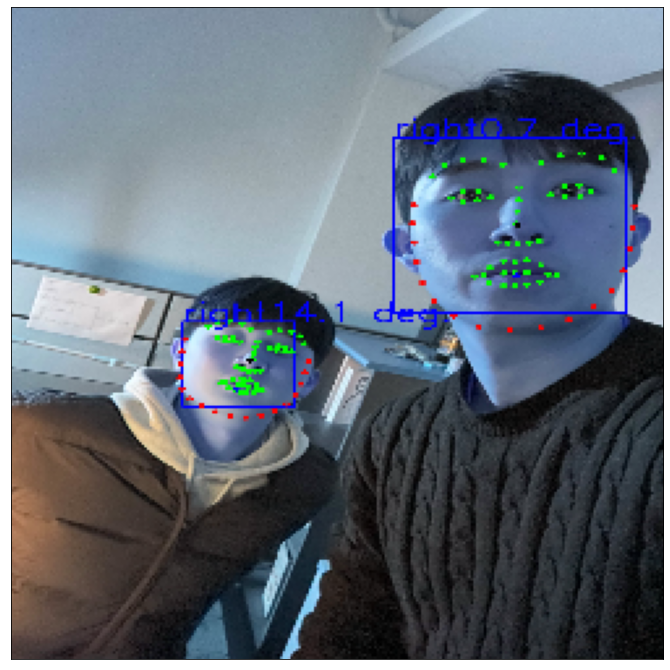

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()